In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (8079, 14)
Wall time: 15.6 s


In [40]:
search(BES_Panel,"Priorities.*W17")

selfPriorities_1W17          8663
selfPriorities_2W17          8663
selfPriorities_3W17          8663
selfPriorities_4W17          8663
selfPriorities_5W17          8663
selfPriorities_6W17          8663
selfPriorities_7W17          8663
selfPriorities_99W17         8663
conPriorities_econW17        8663
conPriorities_costLiveW17    8663
conPriorities_nhsW17         8663
conPriorities_immigW17       8663
conPriorities_crimeW17       8663
conPriorities_schoolW17      8663
conPriorities_noneW17        8663
labPriorities_econW17        8663
labPriorities_costLiveW17    8663
labPriorities_nhsW17         8663
labPriorities_immigW17       8663
labPriorities_crimeW17       8663
labPriorities_schoolW17      8663
labPriorities_noneW17        8663
ldPriorities_econW17         8663
ldPriorities_costLiveW17     8663
ldPriorities_nhsW17          8663
ldPriorities_immigW17        8663
ldPriorities_crimeW17        8663
ldPriorities_schoolW17       8663
ldPriorities_noneW17         8663
brexitPrioriti

In [45]:
(BES_Panel[search(BES_Panel,"brexitPriorities").index]=="Yes").sum()

brexitPriorities_1W17     750
brexitPriorities_2W17    6015
brexitPriorities_3W17     523
brexitPriorities_4W17    2284
brexitPriorities_5W17     659
brexitPriorities_6W17     309
brexitPriorities_7W17     305
dtype: int64

In [34]:
over_55 = pan_dataset_ages["Age_at_W18"]>55

england_only = BES_Panel["countryW18"]=="England"
wts = BES_Panel["wt_new_W18"]

con_bloc = ["CON","BXP"]
lab_bloc = ["LAB","GP","LD"]
ignore_bloc = ['DNV', 'TYTV(Def)', 'TYTV(Maybe)', 'Not Present', 'UNK','DK','PC', 'SNP',]

ign_vote = pan_dataset_votes['2019GEVote_complete'].apply(lambda x: False if x in ignore_bloc else True)


mask = ign_vote & england_only & wts.notnull()

over_55 = over_55[mask].astype('category').cat.rename_categories(["Under 55","55+"])

bloc_votes = pan_dataset_votes['2019GEVote_complete'][mask].cat.remove_unused_categories().replace({"BXP":"Con-bloc", "CON":"Con-bloc", "GP":"Lab-bloc", "LAB":"Lab-bloc", "LD":"Lab-bloc", "OTH":"OTH"})
bloc_votes
pd.crosstab(bloc_votes,over_55,values=wts[mask],aggfunc=sum,normalize='columns')



Age_at_W18,Under 55,55+
2019GEVote_complete,,
Con-bloc,0.366233,0.632810
Lab-bloc,0.613336,0.345223
OTH,0.020430,0.021967


id
1             55+
2             55+
3             55+
4             55+
5             55+
           ...   
98447    Under 55
98448    Under 55
98449    Under 55
98450    Under 55
98451    Under 55
Name: Age_at_W18, Length: 97006, dtype: category
Categories (2, object): [Under 55, 55+]

In [20]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

In [16]:
BES_Panel["p_past_vote_2019"].cat.categories

Index(['Conservative', 'Labour', 'Liberal Democrat',
       'Scottish National Party (SNP)', 'Plaid Cymru', 'Green Party', 'Other',
       'Brexit Party', 'Don't know'],
      dtype='object')

In [9]:
pan_dataset_votes.columns

Index(['2005GEVote', '2005GEVote_complete', '2005GEVote_simple', '2010GEVote',
       '2010GEVote_complete', '2010GEVote_simple', '2015GEVote',
       '2015GEVote_complete', '2015GEVote_simple', '2017GEVote',
       '2017GEVote_complete', '2017GEVote_simple', '2019GEVote',
       '2019GEVote_complete', '2019GEVote_simple', '2016EUVote',
       '2016EUVote_complete', '2016EUVote_simple', '2014EEVote',
       '2014EEVote_complete', '2014EEVote_simple', '2019EEVote',
       '2019EEVote_complete', '2019EEVote_simple', '2014SCOTREF',
       '2014SCOTREF_complete', '2014SCOTREF_simple', '2014LE',
       '2014LE_complete', '2014LE_simple', '2015LE', '2015LE_complete',
       '2015LE_simple', '2016LE', '2016LE_complete', '2016LE_simple', '2017LE',
       '2017LE_complete', '2017LE_simple', '2018LE', '2018LE_complete',
       '2018LE_simple', '2019LE', '2019LE_complete', '2019LE_simple',
       '2011SEC', '2011SEC_complete', '2011SEC_simple', '2011SEL',
       '2011SEL_complete', '2011SEL_simpl

In [9]:
pan_dataset_allr_values.columns[0:2]

Index(['Economic: Left(0) <-> Right(200){uniform}', 'Social: Liberalism(0) <-> Conservatism(200){uniform}'], dtype='object')

In [3]:
wave_list = ["W1_W5","W6","W7_W9","W10_W12","W13","W14W15","W16","W17"]
friendly_wave = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]
wts_to_waves = {"wt_full_W1":"W1_W5","wt_full_W2":"W1_W5","wt_full_W3":"W1_W5","wt_full_W4":"W1_W5","wt_full_W4":"W1_W5",
 'wt_full_W5':"W1_W5", 'wt_new_W6':"W6", 'wt_new_W7':"W7_W9", 'wt_new_W8':"W7_W9", 'wt_new_W9':"W7_W9",
 'wt_new_W10':"W10_W12", 'wt_new_W11':"W10_W12", 'wt_new_W12':"W10_W12", 'wt_new_W13_result':"W13",
 'wt_new_W14':"W14W15", 'wt_new_W15':"W14W15", 'wt_new_W16':"W16", 'wt_new_W17':"W17",}

In [4]:
wave17_vars = search(BES_Panel,"^al\dW17|^lr\dW17").index
value_vars = pan_dataset_allr_values.columns[-2:]


mask = BES_Panel["wave17"]==1.0
df = pan_dataset_allr_values[mask][value_vars].copy()
df[list(wave17_vars)] = BES_Panel[wave17_vars][mask].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
df = df.rename(columns = {x:column_description[x].split(": ")[1] for x in wave17_vars})
df[value_vars[0]] = weighted_qcut(pan_dataset_allr_values[value_vars[0]][mask],BES_Panel["wt_new_W17"][mask],q=21).cat.codes
df[value_vars[1]] = weighted_qcut(pan_dataset_allr_values[value_vars[1]][mask],BES_Panel["wt_new_W17"][mask],q=21).cat.codes

# lazy-weighting!
df = df.loc[lazy_weighted_indices(BES_Panel["wt_new_W17"][mask])]

In [129]:
# pd.Series(lazy_weighted_indices(BES_Panel["wt_new_W17"][mask])).value_counts()


In [107]:
# # pan_dataset_allr_values.columns

# value_vars = pan_dataset_allr_values.columns[-2:]
# value_vars

In [134]:
pan_dataset_ages["standardAgeGroup_at_W19"].value_counts()

66+         23627
56-65       16962
36-45       15988
26-35       15931
46-55       15548
18-25        8950
Under 18        0
Name: standardAgeGroup_at_W19, dtype: int64

In [56]:
## get 'average values' weighted evenly to wave 17

value_vars = pan_dataset_allr_values.columns[-2:]
q=100
weighted_qcut(pan_dataset_allr_values[value_vars[0]][mask],
              BES_Panel["wt_new_W17"][mask],q=q).cat.codes



id
2        96
6         3
7        15
14       97
15       96
         ..
98447    59
98448    78
98449    21
98450    46
98451    35
Length: 34366, dtype: int8

In [66]:
sns.lineplot(data=df,x=)

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Government should redistribute incomes,Big business takes advantage of ordinary people,Ordinary working people do not get their fair share,There is one law for the rich and one for the poor,Management will always try to get the better of employees,Young people today don't respect traditional British values,"For some crimes, death penalty most appropriate sentence",Schools should teach children to obey authority,Censoring films/magazines necessary to uphold moral standards,Lawbreakers should be given stiffer sentences
id,,,,,,,,,,,,
2,195.0,54.0,1,2,2,2,5,2,1,3,1,2
6,6.0,172.0,4,4,4,4,4,4,3,4,1,4
7,30.0,200.0,3,3,3,4,4,4,4,4,4,4
14,196.0,118.0,2,2,2,2,2,2,3,2,2,3
15,193.0,94.0,0,2,1,2,2,3,1,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
98447,118.0,57.0,2,2,1,2,2,1,2,2,1,1
98448,159.0,23.0,1,1,1,3,1,1,1,1,1,1
98449,42.0,49.0,3,2,3,3,3,1,2,1,1,2


In [109]:
value_vars

Index(['Economic: Left <-> Right{gaussian-ish}complete_fully', 'Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully'], dtype='object')

Wall time: 6.69 s


Text(0.5, 0, 'Social: Liberalism(0)-Conservatism(20)')

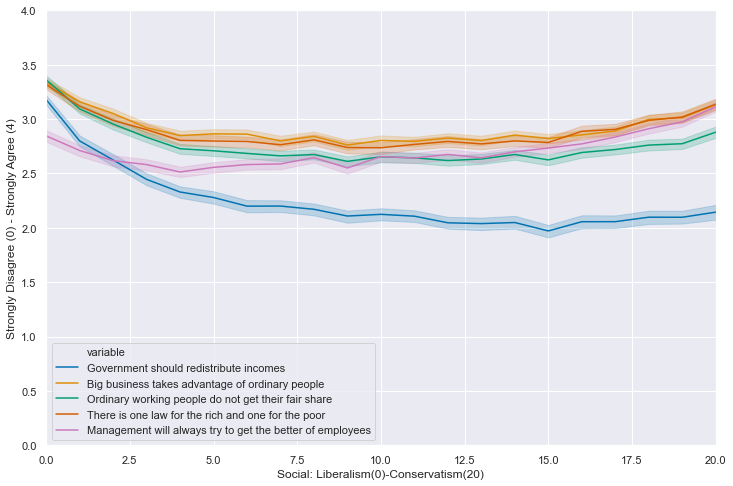

In [121]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[social_var]+lr_vars].melt(id_vars=social_var,value_vars=lr_vars),
             x = social_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Social: Liberalism(0)-Conservatism(20)");


Wall time: 6.71 s


Text(0.5, 0, 'Social: Liberalism(0)-Conservatism(20)')

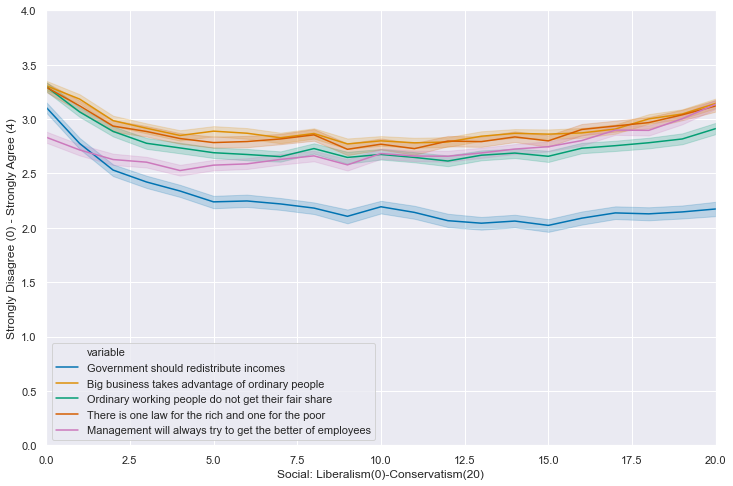

In [130]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[social_var]+lr_vars].melt(id_vars=social_var,value_vars=lr_vars),
             x = social_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Social: Liberalism(0)-Conservatism(20)");


Wall time: 6.74 s


Text(0.5, 0, 'Economic: Left(0)-Right(20)')

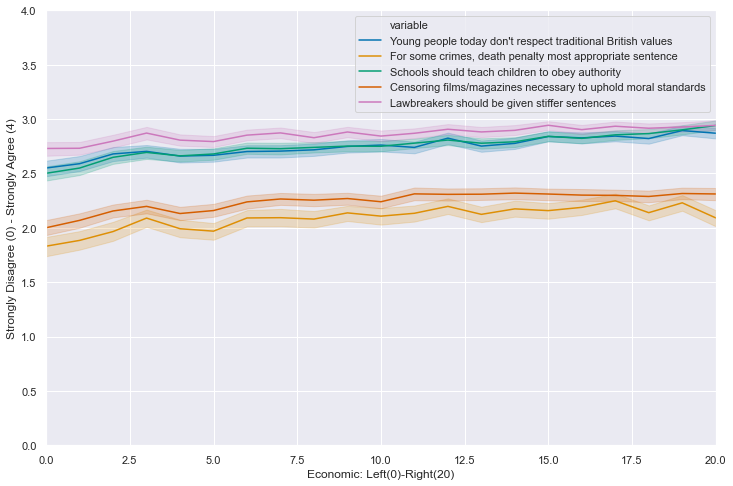

In [122]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[economic_var]+al_vars].melt(id_vars=economic_var,value_vars=al_vars),
             x = economic_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Economic: Left(0)-Right(20)");


Wall time: 6.82 s


Text(0.5, 0, 'Economic: Left(0)-Right(20)')

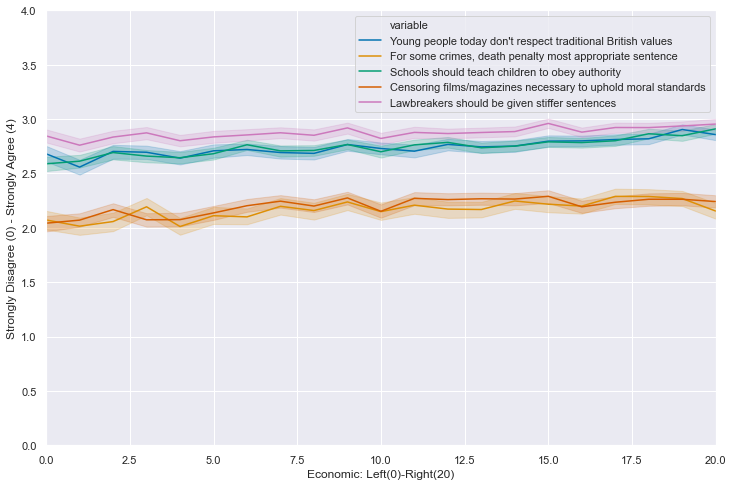

In [131]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[economic_var]+al_vars].melt(id_vars=economic_var,value_vars=al_vars),
             x = economic_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Economic: Left(0)-Right(20)");


In [135]:
mask = (BES_Panel["wave17"]==1.0) & (pan_dataset_ages["standardAgeGroup_at_W19"]=="66+")

df = pan_dataset_allr_values[mask][value_vars].copy()
df[list(wave17_vars)] = BES_Panel[wave17_vars][mask].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
df = df.rename(columns = {x:column_description[x].split(": ")[1] for x in wave17_vars})
df[value_vars[0]] = weighted_qcut(pan_dataset_allr_values[value_vars[0]][mask],BES_Panel["wt_new_W17"][mask],q=21).cat.codes
df[value_vars[1]] = weighted_qcut(pan_dataset_allr_values[value_vars[1]][mask],BES_Panel["wt_new_W17"][mask],q=21).cat.codes

# lazy-weighting!
df = df.loc[lazy_weighted_indices(BES_Panel["wt_new_W17"][mask])]

Wall time: 5.29 s


Text(0.5, 0, 'Social: Liberalism(0)-Conservatism(20)')

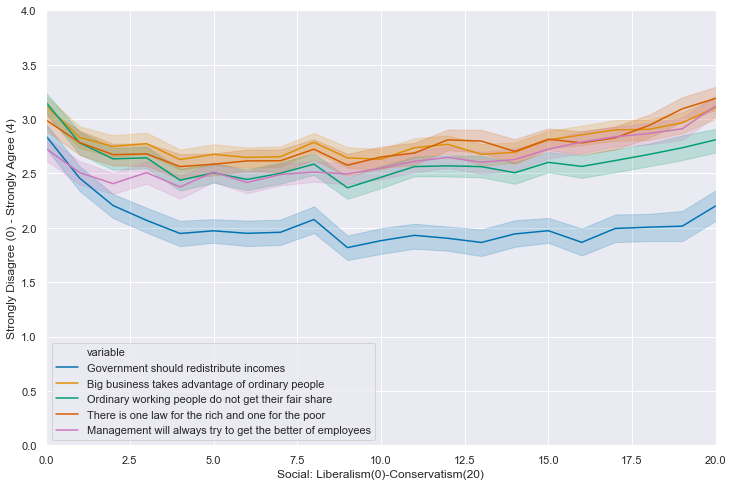

In [136]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[social_var]+lr_vars].melt(id_vars=social_var,value_vars=lr_vars),
             x = social_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Social: Liberalism(0)-Conservatism(20)");


Wall time: 5.33 s


Text(0.5, 0, 'Economic: Left(0)-Right(20)')

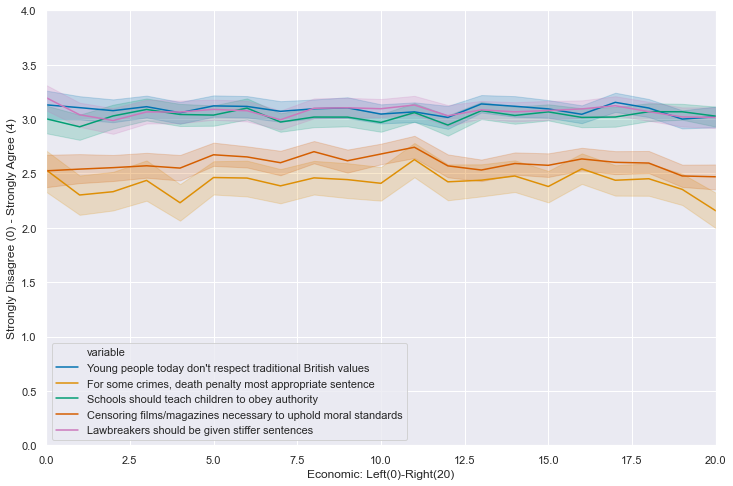

In [137]:
%%time
social_var = value_vars[1]
economic_var = value_vars[0]
lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

plt.figure(figsize=(12,8));
sns.lineplot(data = df[[economic_var]+al_vars].melt(id_vars=economic_var,value_vars=al_vars),
             x = economic_var, hue="variable", y="value",n_boot = 1000)
plt.ylim([0,4]);
plt.xlim([0,20]);
plt.ylabel("Strongly Disagree (0) - Strongly Agree (4)");
plt.xlabel("Economic: Left(0)-Right(20)");


In [138]:
df

,Economic: Left <-> Right{gaussian-ish}complete_fully,Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully,Government should redistribute incomes,Big business takes advantage of ordinary people,Ordinary working people do not get their fair share,There is one law for the rich and one for the poor,Management will always try to get the better of employees,Young people today don't respect traditional British values,"For some crimes, death penalty most appropriate sentence",Schools should teach children to obey authority,Censoring films/magazines necessary to uphold moral standards,Lawbreakers should be given stiffer sentences
id,,,,,,,,,,,,
2,19,3,1.0,2.0,2.0,2.0,NaN,2.0,1.0,3.0,1.0,2.0
14,20,8,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0
15,19,6,0.0,2.0,1.0,2.0,2.0,3.0,1.0,4.0,0.0,4.0
36,15,11,0.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0
118,1,3,3.0,4.0,4.0,3.0,4.0,3.0,0.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
98241,4,12,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
98366,1,1,3.0,3.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,3.0
98390,11,1,2.0,2.0,3.0,3.0,2.0,4.0,4.0,4.0,2.0,4.0


In [97]:
# social_var = "Social: Liberalism(0) <-> Conservatism(200){uniform}"
# economic_var = "Economic: Left(0) <-> Right(200){uniform}"
# lr_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[0:5]}.values())
# al_vars = list({x:column_description[x].split(": ")[1] for x in wave17_vars[5:]}.values())

# plt.figure(figsize=(12,8));
# sns.regplot(data = df[[social_var]+lr_vars].melt(id_vars=social_var,value_vars=lr_vars),
#              x = social_var, hue="variable", y="value",n_boot = 1,lowess=True)
# plt.ylim([0,4]);
# #.set_index(social_var).stack().reset_index()


# use lowess + factorplot + partial to regress out effect of age

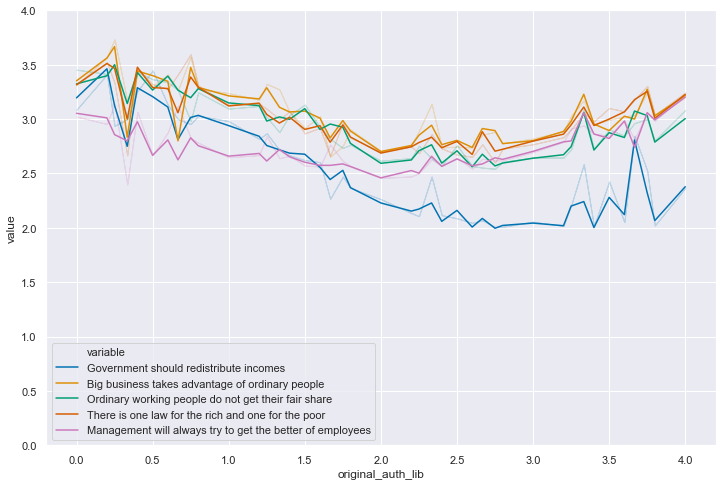

In [95]:

df["original_auth_lib"] = df[al_vars].mean(axis=1)
social_var = "original_auth_lib"
plt.figure(figsize=(12,8));
sns.lineplot(data = df[[social_var]+lr_vars].melt(id_vars=social_var,value_vars=lr_vars),
             x = social_var, hue="variable", y="value",n_boot = 1)
plt.ylim([0,4]);

In [ ]:
#####################################################

In [411]:
def weighted_mean(x, **kws):
    val, weight = map(np.asarray, zip(*x))
    mask = (~np.isnan(val))&(~np.isnan(weight))
    val, weight = val[mask],weight[mask]
    return (val * weight).sum() / weight.sum()

def get_wave(x):
    try:
        return re.match(".*(W\d+)$",x).groups()[0]
    except:
        raise Exception()
        
def get_stub(x):
    try:
        return re.match("(.*)W\d+$",x).groups()[0]
    except:
        raise Exception()

waves_to_wts = {"W"+str(x):search(BES_Panel,"wt_(new|full)_W"+str(x)+"($|_result)").index[0] for x in range(1,20)}        

def plot_party_vars(cols, title, ncol=6,figx=12,figy=6,ylabel=None):

    dash_styles = cycle(["",
                   (4, 1.5),
                   (1, 1),
                   (3, 1, 1.5, 1),
                   (5, 1, 1, 1),
                   (5, 1, 2, 1, 2, 1),
                   (2, 2, 3, 1.5),
                   (1, 2.5, 3, 1.2)])
    filled_markers = cycle(['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X'])

    plt.figure(figsize=(figx,figy))

    ax = plt.gca()
    g = sns.lineplot( data = df_better_ind[cols].reset_index().melt(id_vars = ["index"]),
                  dashes=dash_styles,markers=filled_markers,legend='brief',ax=ax,
                  x='index',y='value',hue='variable',style='variable')
    date_col_dict = {"EE":'green',"GE":'red',"EU":'blue',"OB":'pink',"CL":'purple',"CAMP":'orange',"normal":'grey'}  
    date_dict = {"22 May 2014":"EE","7 May 2015":"GE","23 June 2016":"EU",
             "8 June 2017":"GE","23 May 2019":"EE","12 December 2019":"GE"}        
    for event in date_dict.keys():
        event_date =pd.to_datetime(event)
        plt.vlines(x=event_date, ymin=0, ymax=1.0,
                   linestyles='dashed', lw=.5,
                   colors=date_col_dict[date_dict[event]],);
    
    ax.legend(loc='centre right',ncol=ncol);
    plt.ylim([0,1]);
    plt.title(title,fontsize=16);
    if ylabel is not None:
        plt.ylabel(ylabel,fontsize=16)
        
        
    plt.xlabel("Date of British Election Study Wave\n(Green = Euro Election, Red = General Elections, Blue = EU ref)",
               fontsize=16);

In [412]:
### add automatic scaling
### weights
### do for different parties


In [413]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 2
party = "Con"
party_long = "Conservatives"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp


Wall time: 1min 48s


In [414]:
# manual fix for weirdness!
# df_Con = df.copy()

df.loc["W17","conPriorities_costLive"] = 1-df.loc["W17","conPriorities_costLive"]

In [415]:
df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]

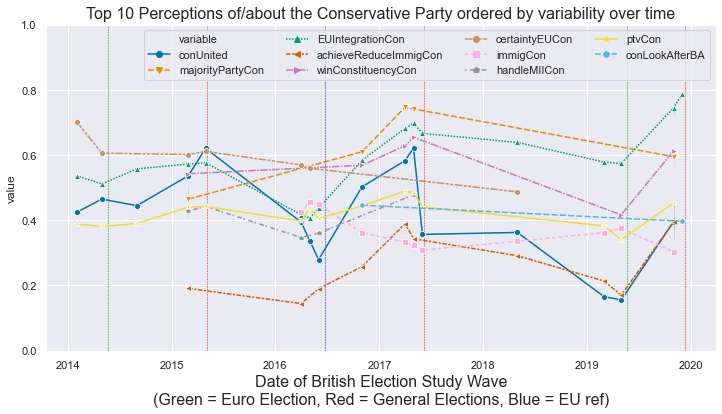

In [416]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
highest_var_cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index

plot_party_vars(highest_var_cols, "Top 10 Perceptions of/about the Conservative Party ordered by variability over time",
                ncol=4,figx=12,figy=6)

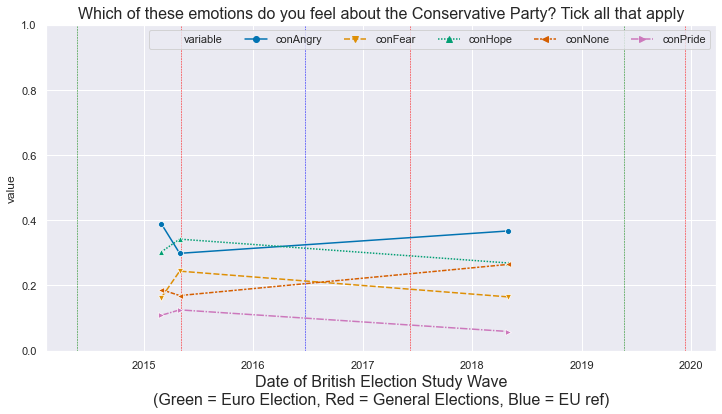

In [417]:
emote_vars = list(search(df,party+"(None|Angry|Fear|Hope|Pride)").index)

plot_party_vars(emote_vars, "Which of these emotions do you feel about the Conservative Party? Tick all that apply",
                ncol=6,figx=12,figy=6)

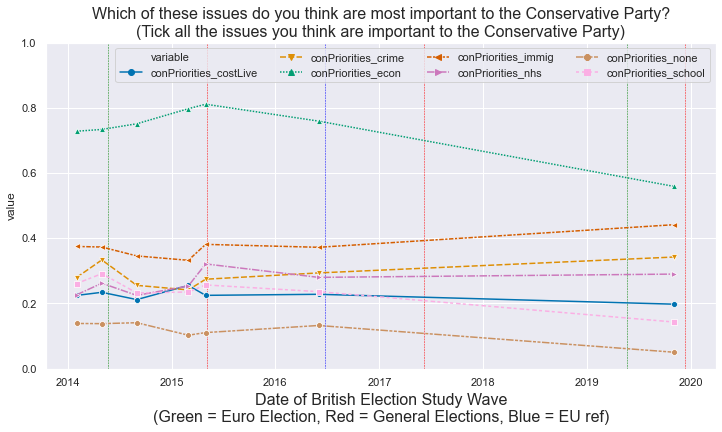

In [418]:
priority_cols = search(df_better_ind,"conPriorities").index

plot_party_vars(priority_cols,
                "Which of these issues do you think are most important to the Conservative Party?\n(Tick all the issues you think are important to the Conservative Party)",
                ncol=4,figx=12,figy=6)

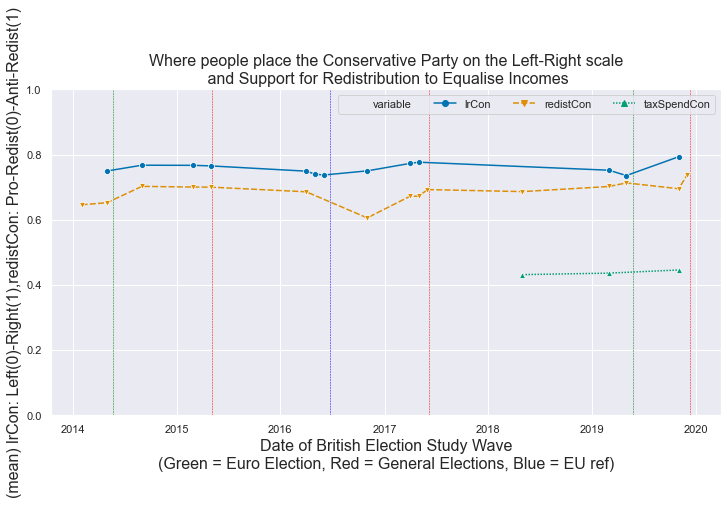

In [419]:
ec_cols = search(df_better_ind,"^lr|^redist|taxSpend").index

plot_party_vars(ec_cols,
                "Where people place the Conservative Party on the Left-Right scale\n and Support for Redistribution to Equalise Incomes",
                ncol=4,figx=12,figy=6,
                ylabel="(mean) lrCon: Left(0)-Right(1),redistCon: Pro-Redist(0)-Anti-Redist(1)")

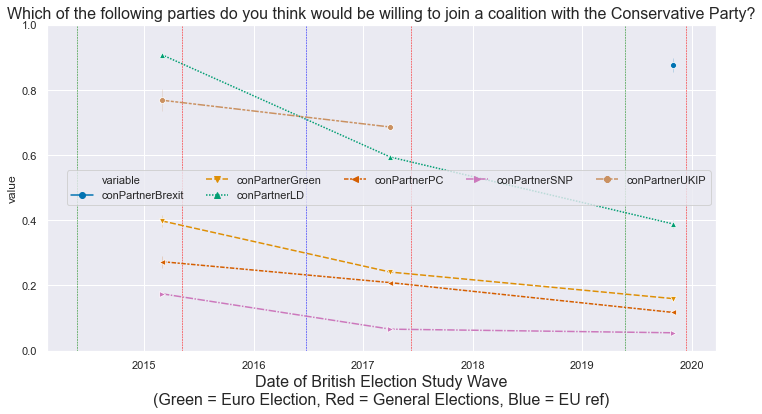

In [420]:
partner_cols = search(df_better_ind,"Partner").index

plot_party_vars(partner_cols,
                "Which of the following parties do you think would be willing to join a coalition with the Conservative Party?",
                ncol=5,figx=12,figy=6)

In [421]:
# responsible_cols = search(df_better_ind,"responsible").index

# plot_party_vars(responsible_cols,
#                 "Which of the following parties do you think would be willing to join a coalition with the Conservative Party?",
#                 ncol=5,figx=12,figy=6)

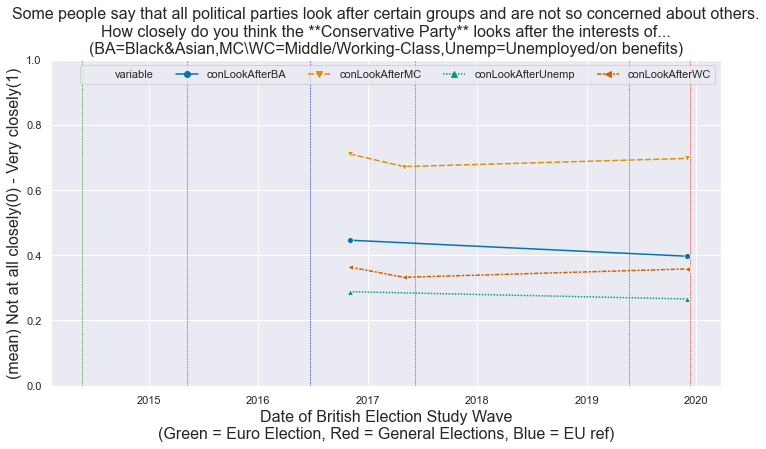

In [422]:
look_after_cols = search(df_better_ind,"LookAfter").index

plot_party_vars(look_after_cols,
                "Some people say that all political parties look after certain groups and are not so concerned about others.\nHow closely do you think the **Conservative Party** looks after the interests of...\n(BA=Black&Asian,MC\WC=Middle/Working-Class,Unemp=Unemployed/on benefits)",
                ylabel="(mean) Not at all closely(0) - Very closely(1)",                
                ncol=5,figx=12,figy=6)

In [423]:
df_con=df.copy()

In [424]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 2
party = "Lab"
party_long = "Labour"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp

df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]

Wall time: 2min 17s


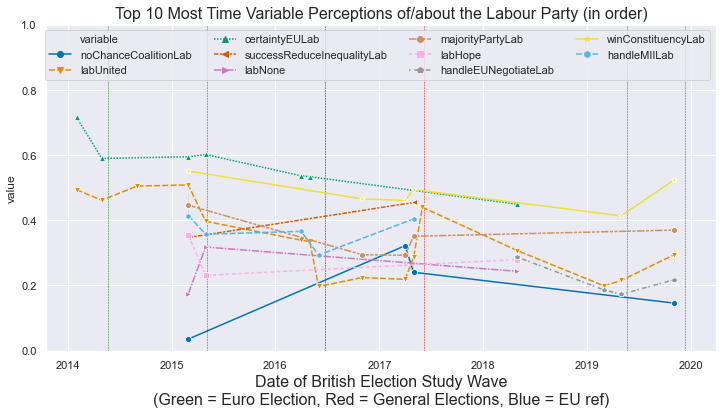

In [425]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index
title = "Top 10 Most Time Variable Perceptions of/about the Labour Party (in order)"

plot_party_vars(cols, title,
                ncol=4,figx=12,figy=6)

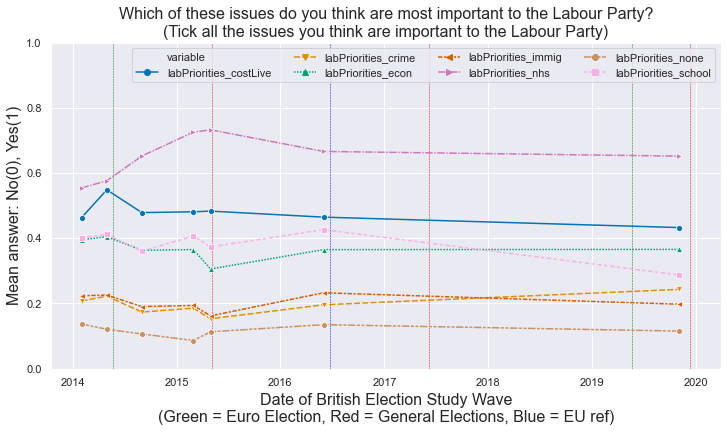

In [426]:
cols = search(df_better_ind,"Priorities").index
title = "Which of these issues do you think are most important to the Labour Party?\n(Tick all the issues you think are important to the Labour Party)"

plot_party_vars(cols, title, ylabel = "Mean answer: No(0), Yes(1)",
                ncol=4,figx=12,figy=6)

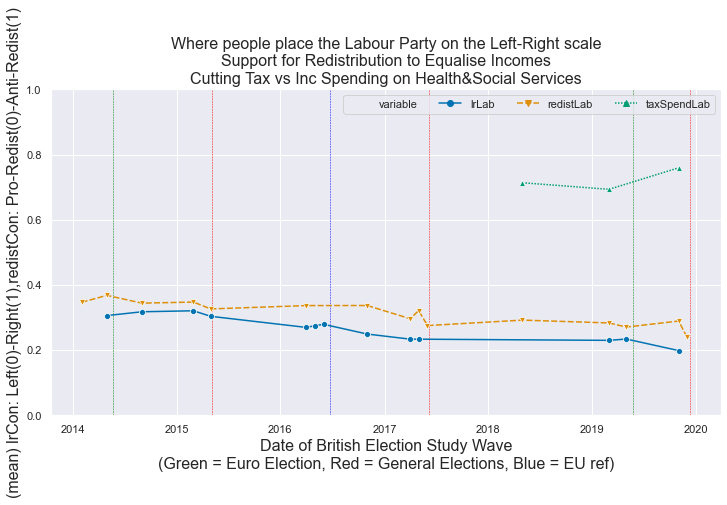

In [427]:
ec_cols = search(df_better_ind,"^lr|^redist|taxSpend").index

plot_party_vars(ec_cols,
                "Where people place the Labour Party on the Left-Right scale\nSupport for Redistribution to Equalise Incomes\nCutting Tax vs Inc Spending on Health&Social Services",
                ncol=4,figx=12,figy=6,
                ylabel="(mean) lrCon: Left(0)-Right(1),redistCon: Pro-Redist(0)-Anti-Redist(1)")

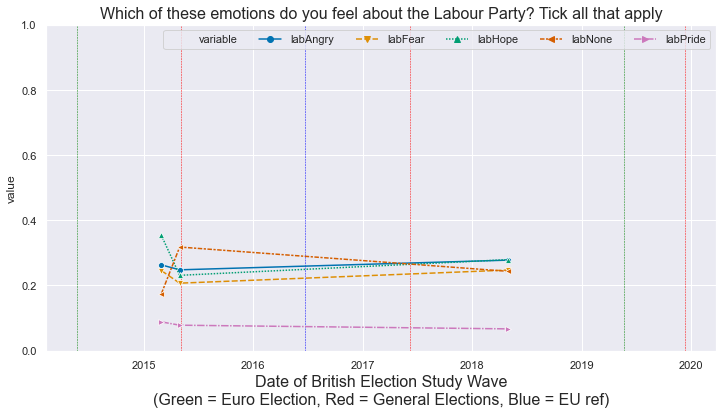

In [428]:
emote_vars = list(search(df,party+"(None|Angry|Fear|Hope|Pride)").index)

plot_party_vars(emote_vars, "Which of these emotions do you feel about the Labour Party? Tick all that apply",
                ncol=6,figx=12,figy=6)

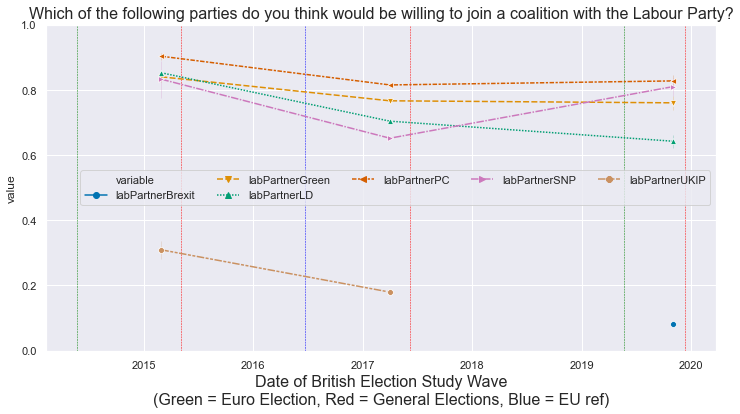

In [429]:
partner_cols = search(df_better_ind,"Partner").index

plot_party_vars(partner_cols,
                "Which of the following parties do you think would be willing to join a coalition with the Labour Party?",
                ncol=5,figx=12,figy=6)

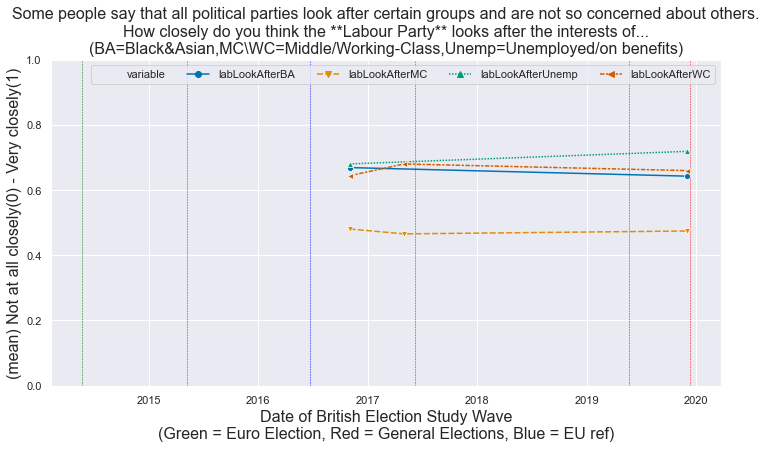

In [430]:
look_after_cols = search(df_better_ind,"LookAfter").index

plot_party_vars(look_after_cols,
                "Some people say that all political parties look after certain groups and are not so concerned about others.\nHow closely do you think the **Labour Party** looks after the interests of...\n(BA=Black&Asian,MC\WC=Middle/Working-Class,Unemp=Unemployed/on benefits)",
                ylabel="(mean) Not at all closely(0) - Very closely(1)",                
                ncol=5,figx=12,figy=6)

In [431]:
df.columns

search(BES_Panel,"government")
# party="Govt"
# search(BES_Panel,party+"W\d+", case_sensitive=True)

Series([], dtype: float64)

In [432]:
# [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+".*W\d+", case_sensitive=True).index]

In [433]:
df_lab = df.copy()

In [434]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 2
party = "LD"
party_long = "LibDems"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp

df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]    

Wall time: 1min 39s


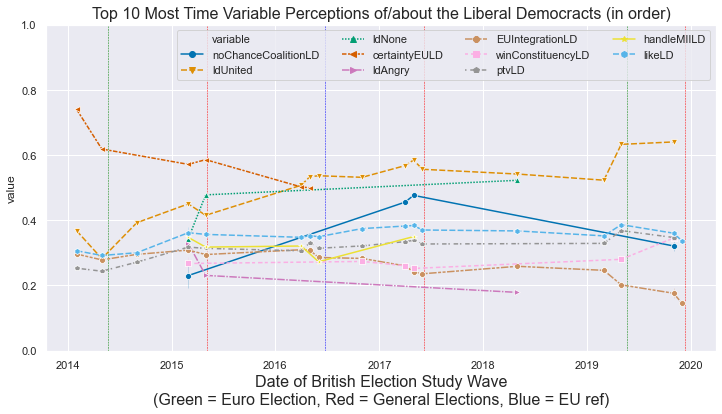

In [435]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index
title = "Top 10 Most Time Variable Perceptions of/about the Liberal Democracts (in order)"

plot_party_vars(cols, title,
                ncol=4,figx=12,figy=6)

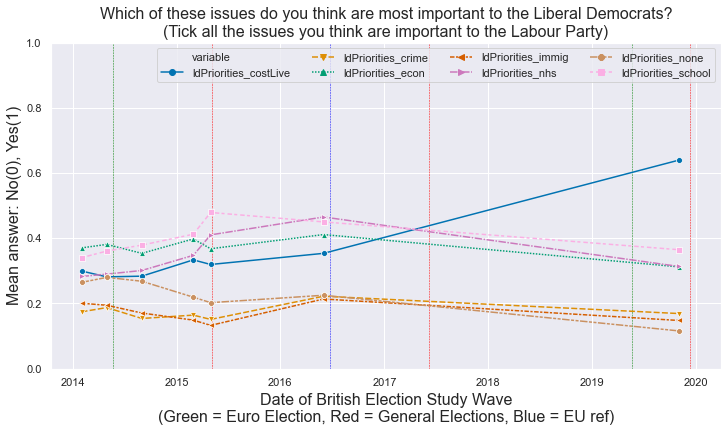

In [436]:
cols = search(df_better_ind,"Priorities").index
title = "Which of these issues do you think are most important to the Liberal Democrats?\n(Tick all the issues you think are important to the Labour Party)"

plot_party_vars(cols, title, ylabel = "Mean answer: No(0), Yes(1)",
                ncol=4,figx=12,figy=6)

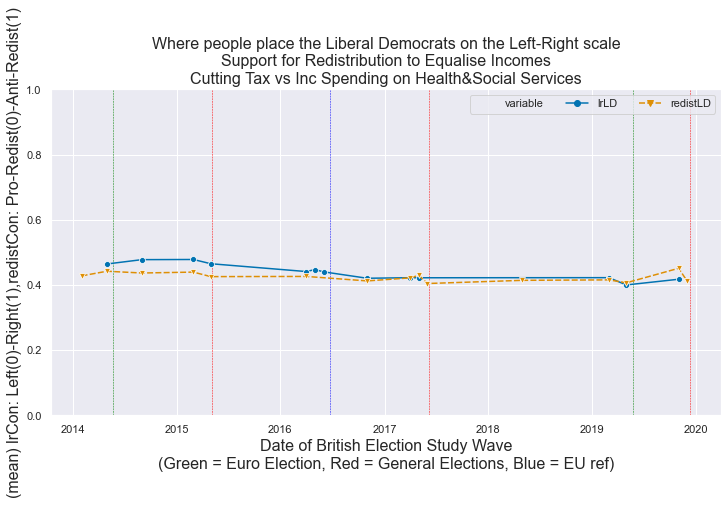

In [437]:
ec_cols = search(df_better_ind,"^lr|^redist|taxSpend").index

plot_party_vars(ec_cols,
                "Where people place the Liberal Democrats on the Left-Right scale\nSupport for Redistribution to Equalise Incomes\nCutting Tax vs Inc Spending on Health&Social Services",
                ncol=4,figx=12,figy=6,
                ylabel="(mean) lrCon: Left(0)-Right(1),redistCon: Pro-Redist(0)-Anti-Redist(1)")

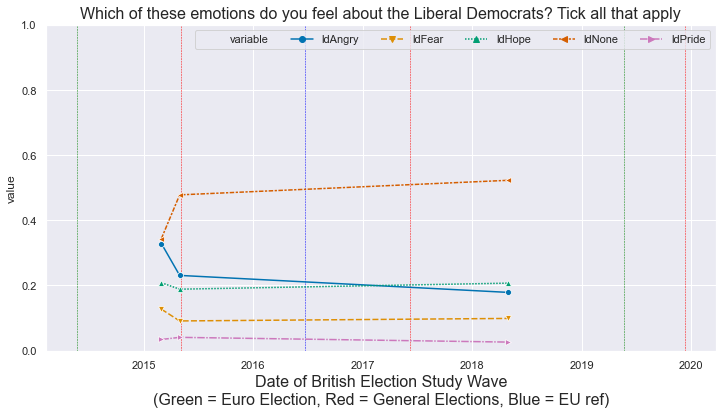

In [438]:
emote_vars = list(search(df,party+"(None|Angry|Fear|Hope|Pride)").index)

plot_party_vars(emote_vars, "Which of these emotions do you feel about the Liberal Democrats? Tick all that apply",
                ncol=6,figx=12,figy=6)

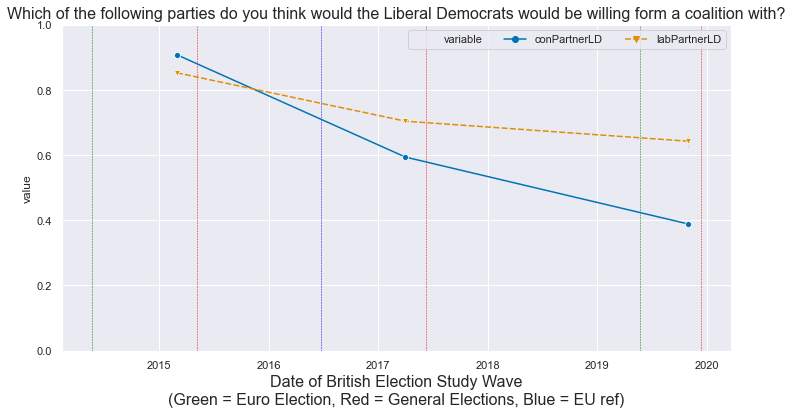

In [439]:
partner_cols = search(df_better_ind,"Partner").index

plot_party_vars(partner_cols,
                "Which of the following parties do you think would the Liberal Democrats would be willing form a coalition with?",
                ncol=5,figx=12,figy=6)

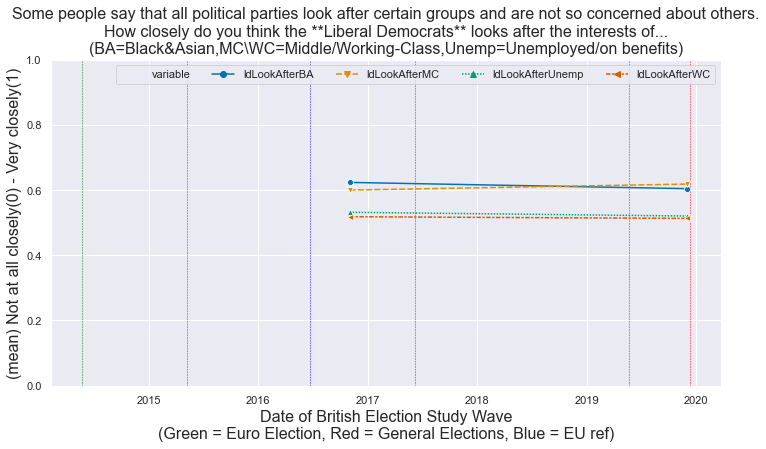

In [440]:
look_after_cols = search(df_better_ind,"LookAfter").index

plot_party_vars(look_after_cols,
                "Some people say that all political parties look after certain groups and are not so concerned about others.\nHow closely do you think the **Liberal Democrats** looks after the interests of...\n(BA=Black&Asian,MC\WC=Middle/Working-Class,Unemp=Unemployed/on benefits)",
                ylabel="(mean) Not at all closely(0) - Very closely(1)",                
                ncol=5,figx=12,figy=6)

In [441]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 2
party = "Govt"
party_long = "Government"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp

df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]    

Wall time: 41.7 s


In [442]:
df

,approveScotGovt,approveUKGovt,approveWelshGovt,responsibleCostLiveScotGovt,responsibleCostLiveWelshGovt,responsibleCrimeScottishGovt,responsibleCrimeWelshGovt,responsibleEconScottishGovt,responsibleEconWelshGovt,responsibleEducationScotGovt,...,responsibleImmigWelshGovt,responsibleNHSScottishGovt,responsibleNHSWelshGovt,govtHandleCostLive,govtHandleEcon,govtHandleEduc,govtHandleImmig,govtHandleLevelCrime,govtHandleNHS,govtHandouts
W1,0.517289,0.428970,0.469665,0.063837,0.045086,0.178073,0.076095,0.096113,0.065842,0.210202,...,0.027502,0.145257,0.211757,0.342066,0.453212,0.384428,0.305475,0.452395,0.319481,0.675101
W2,0.522467,0.417961,0.456709,0.068955,0.063690,0.202829,0.086222,0.103158,0.067193,0.227558,...,0.038957,0.170165,0.246737,0.356930,0.496723,0.360961,0.289497,0.465752,0.301631,0.675711
W3,0.593614,0.420300,0.454044,0.071707,0.055046,0.207519,0.064239,0.096938,0.054876,0.274689,...,0.024172,0.200478,0.224253,0.349989,0.478904,0.388543,0.276039,0.458842,0.305517,0.677666
W4,0.585598,0.442793,0.458521,0.085989,0.043839,0.210370,0.091159,0.109810,0.059173,0.264875,...,0.031716,0.201650,0.225823,0.408394,0.520866,0.392426,0.274049,0.466328,0.293051,0.681457
W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W7,0.525232,0.412411,0.457776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.391469,0.441201,0.331986,0.242810,0.436963,0.231562,0.666001
W8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W9,0.529736,0.403723,0.480023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W10,0.491477,0.455747,0.479316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


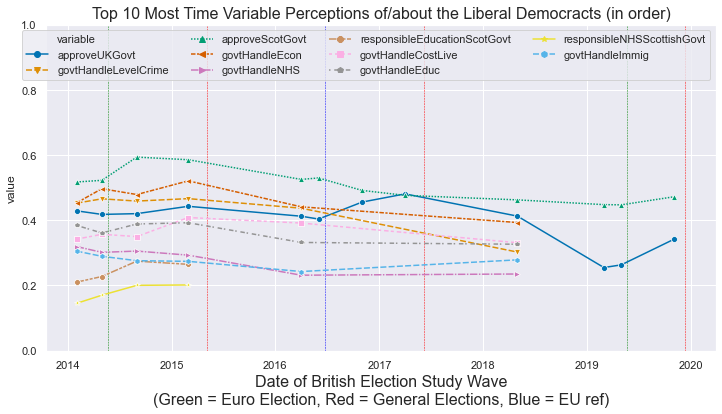

In [443]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index
title = "Top 10 Most Time Variable Perceptions of/about the Liberal Democracts (in order)"

plot_party_vars(cols, title,
                ncol=4,figx=12,figy=6)

In [444]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 2
party = "Ukip"
party_long = "UKIP"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp

df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]    

Wall time: 1min 18s


In [446]:
df.columns

Index(['ukipAngry', 'ukipFear', 'ukipHope', 'ukipLookAfterMC',
       'ukipLookAfterWC', 'ukipNone', 'ukipPride', 'ukipPriorities_costLive',
       'ukipPriorities_crime', 'ukipPriorities_econ', 'ukipPriorities_immig',
       'ukipPriorities_nhs', 'ukipPriorities_none', 'ukipPriorities_school',
       'ukipTone', 'ukipUnited', 'EUContactLeaveUKIP', 'EUContactRemainUKIP',
       'EUIntegrationUKIP', 'achieveReduceImmigUKIP', 'certaintyEUUKIP',
       'certaintyRedistUKIP', 'conPartnerUKIP', 'eesEUIntegrationUKIP',
       'handleMIIUKIP', 'immigUKIP', 'labPartnerUKIP', 'likeUKIP', 'lrUKIP',
       'natSecurityUKIP', 'noChanceCoalitionUKIP', 'partySiteUKIP', 'ptvUKIP',
       'redistUKIP', 'socialDistUKIP', 'successReduceInequalityUKIP',
       'winConstituencyUKIP'],
      dtype='object')

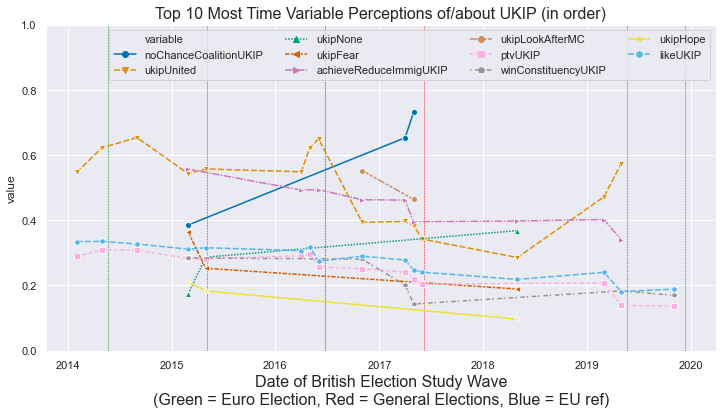

In [447]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index
title = "Top 10 Most Time Variable Perceptions of/about UKIP (in order)"

plot_party_vars(cols, title,
                ncol=4,figx=12,figy=6)

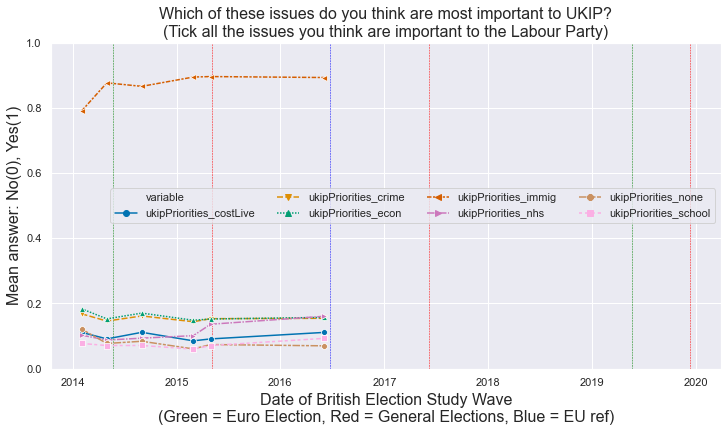

In [448]:
cols = search(df_better_ind,"Priorities").index
title = "Which of these issues do you think are most important to UKIP?\n(Tick all the issues you think are important to the Labour Party)"

plot_party_vars(cols, title, ylabel = "Mean answer: No(0), Yes(1)",
                ncol=4,figx=12,figy=6)

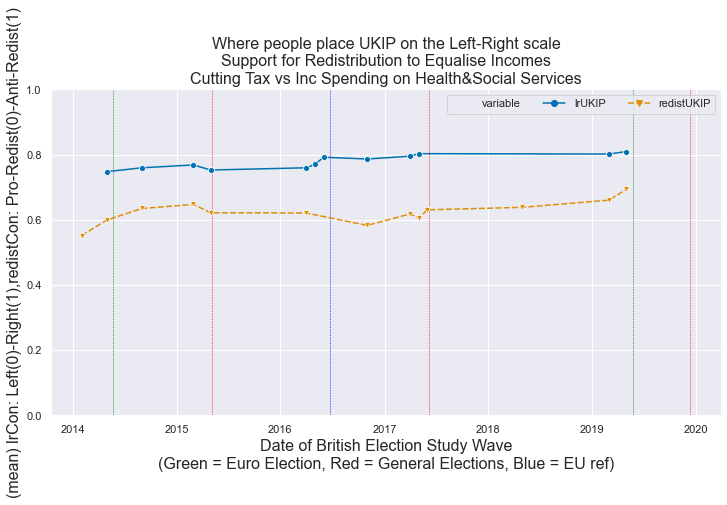

In [449]:
ec_cols = search(df_better_ind,"^lr|^redist|taxSpend").index

plot_party_vars(ec_cols,
                "Where people place UKIP on the Left-Right scale\nSupport for Redistribution to Equalise Incomes\nCutting Tax vs Inc Spending on Health&Social Services",
                ncol=4,figx=12,figy=6,
                ylabel="(mean) lrCon: Left(0)-Right(1),redistCon: Pro-Redist(0)-Anti-Redist(1)")

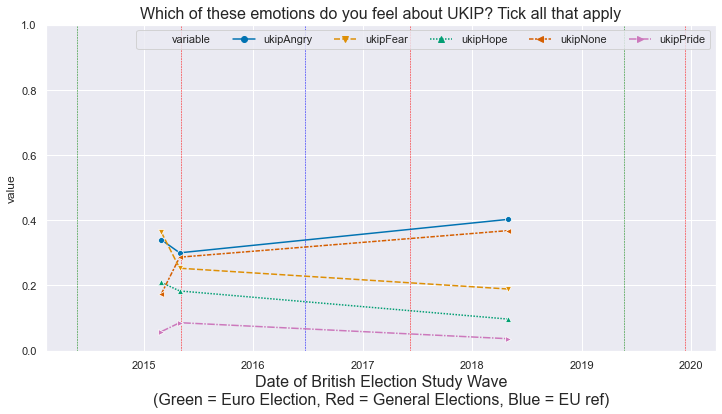

In [450]:
emote_vars = list(search(df,party+"(None|Angry|Fear|Hope|Pride)").index)

plot_party_vars(emote_vars, "Which of these emotions do you feel about UKIP? Tick all that apply",
                ncol=6,figx=12,figy=6)

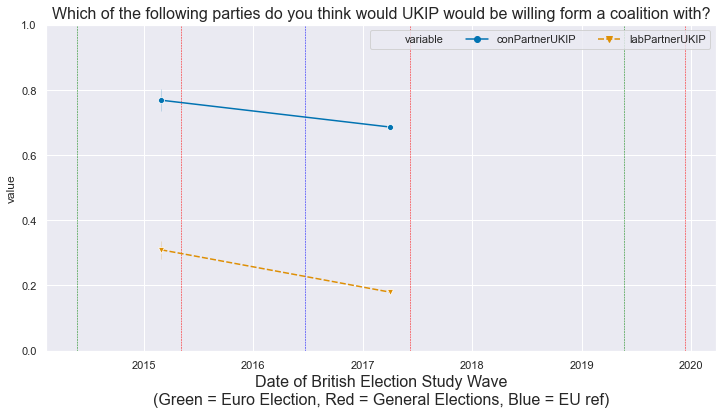

In [451]:
partner_cols = search(df_better_ind,"Partner").index

plot_party_vars(partner_cols,
                "Which of the following parties do you think would UKIP would be willing form a coalition with?",
                ncol=5,figx=12,figy=6)

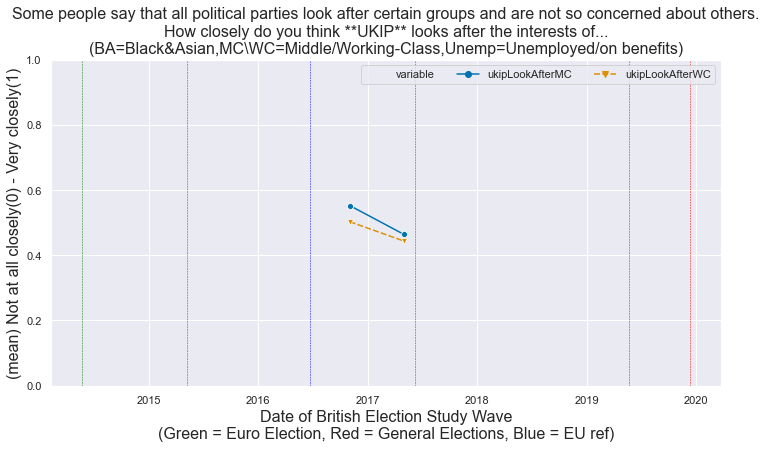

In [452]:
look_after_cols = search(df_better_ind,"LookAfter").index

plot_party_vars(look_after_cols,
                "Some people say that all political parties look after certain groups and are not so concerned about others.\nHow closely do you think **UKIP** looks after the interests of...\n(BA=Black&Asian,MC\WC=Middle/Working-Class,Unemp=Unemployed/on benefits)",
                ylabel="(mean) Not at all closely(0) - Very closely(1)",                
                ncol=5,figx=12,figy=6)

In [454]:
df_ukip = df.copy()

In [523]:
%%time
df = pd.DataFrame(index = ["W"+str(x) for x in range(1,20)])
min_waves = 1
party = "Brexit"
party_long = "BrexitParty"

con_cols = list(np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,party+"W\d+", case_sensitive=True).index] ))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+party.lower()+"[A-Z].*W\d+", case_sensitive=True).index] )))
con_cols.extend( list( np.unique( [re.match("(.*)W\d+",x).groups()[0] for x in search(BES_Panel,"^"+".*"+party_long+"W\d+", case_sensitive=True).index] )))
ser=pd.Series()

for x in con_cols:
    ser[x] = len( search(BES_Panel,"^"+x).index )



for col in ser[(ser>=min_waves)&(ser<=19)].index:

    temp = BES_Panel[search(BES_Panel,"^"+col+"W\d+").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))
    # scale to 0-1
    temp = ( temp-temp.min().min() )/( temp.max().max()-temp.min().min() )
    # weighted means
#     temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[("W"+x.name.split("W")[1])]])) ,axis=0 )
    temp_wts = temp.apply(lambda x: list(zip( x,BES_Panel[waves_to_wts[get_wave(x.name) ]])) ,axis=0 )
    temp = temp_wts.apply(weighted_mean)    

    temp.index = [get_wave(x) for x in temp.index]
    temp

    df[col] = temp

df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]    

Wall time: 31.1 s


In [524]:
df_better_ind = df_better_ind.drop(['brexitBrexPref', 'brexitNextPref','cancelBrexit'],axis=1)

In [525]:
df_better_ind_BXP = df_better_ind.copy()

In [526]:
df = df_ukip.copy()
df_better_ind = df.copy()
df_better_ind.index =  [int(x[1:]) for x in df.index]
wave_no_to_date = pd.to_datetime(BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Date_Start"],
              format = "%b-%y").to_dict()

df_better_ind.index = [wave_no_to_date[x] for x in df_better_ind.index]
df_better_ind_UKIP = df_better_ind.copy()

In [469]:
df_better_ind_BXP.shape,df_better_ind_UKIP.shape

((19, 13), (19, 37))

In [527]:
# df_better_ind_BXP.

In [473]:
# [x.replace("UKIP","").replace("ukip","") for x in df_better_ind_UKIP]

['Angry',
 'Fear',
 'Hope',
 'LookAfterMC',
 'LookAfterWC',
 'None',
 'Pride',
 'Priorities_costLive',
 'Priorities_crime',
 'Priorities_econ',
 'Priorities_immig',
 'Priorities_nhs',
 'Priorities_none',
 'Priorities_school',
 'Tone',
 'United',
 'EUContactLeave',
 'EUContactRemain',
 'EUIntegration',
 'achieveReduceImmig',
 'certaintyEU',
 'certaintyRedist',
 'conPartner',
 'eesEUIntegration',
 'handleMII',
 'immig',
 'labPartner',
 'like',
 'lr',
 'natSecurity',
 'noChanceCoalition',
 'partySite',
 'ptv',
 'redist',
 'socialDist',
 'successReduceInequality',
 'winConstituency']

In [475]:
# [x.replace("BrexitParty","").replace("Brexit","").replace("brexit","") for x in df_better_ind_BXP]

['EUIntegration',
 'achieveReduceImmig',
 'conPartner',
 'immig',
 'labPartner',
 'lr',
 'majorityParty',
 'noChanceCoalition',
 'redist',
 'winConstituency',
 'United',
 'like',
 'ptv']

In [528]:
df_better_ind_UKIP.columns = [x.replace("UKIP","").replace("ukip","") for x in df_better_ind_UKIP]
df_better_ind_BXP.columns  = [x.replace("BrexitParty","").replace("Brexit","").replace("brexit","") for x in df_better_ind_BXP]

df_better_ind_BXP = df_better_ind_BXP.reindex(columns=df_better_ind_BXP.columns.tolist()+ list(set(df_better_ind_UKIP.columns) - set(df_better_ind_BXP.columns)), fill_value=np.nan)
df_better_ind_UKIP["majorityParty"] = np.nan

df_better_ind = df_better_ind_UKIP.where(df_better_ind_UKIP.apply(lambda x: x.index<'2019-03-01'),df_better_ind_BXP)

In [491]:
# df_better_ind_BXP.columns = [list(df_better_ind_BXP.columns)+list(set(df_better_ind_UKIP.columns) - set(df_better_ind_BXP.columns))]



In [529]:
df_better_ind

,Angry,Fear,Hope,LookAfterMC,LookAfterWC,None,Pride,Priorities_costLive,Priorities_crime,Priorities_econ,...,lr,natSecurity,noChanceCoalition,partySite,ptv,redist,socialDist,successReduceInequality,winConstituency,majorityParty
2014-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111648,0.168510,0.183852,...,NaN,NaN,NaN,NaN,0.288940,0.551500,NaN,NaN,NaN,NaN
2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091441,0.146124,0.152909,...,0.747499,NaN,NaN,NaN,0.309599,0.599260,NaN,NaN,NaN,NaN
2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111619,0.161823,0.170553,...,0.759287,NaN,NaN,NaN,0.308117,0.634483,NaN,NaN,NaN,NaN
2015-03-01,0.340079,0.363272,0.209310,NaN,NaN,0.174505,0.058685,0.085521,0.144117,0.148627,...,0.762881,0.290110,0.386009,0.199639,0.275742,0.647015,NaN,0.051436,0.279757,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.773197,NaN,0.385158,0.205309,0.290212,NaN,NaN,NaN,0.289596,NaN
2015-05-01,0.300219,0.252919,0.183296,NaN,NaN,0.286811,0.085974,0.091412,0.153439,0.152489,...,0.752456,NaN,NaN,NaN,0.281623,0.621412,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.759311,0.284717,NaN,NaN,0.291162,0.620650,0.404282,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.769599,NaN,NaN,NaN,0.297286,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111256,0.154597,0.157366,...,0.791668,NaN,NaN,NaN,0.257037,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,0.552520,0.502990,NaN,NaN,NaN,NaN,NaN,...,0.786272,0.269106,NaN,NaN,0.251480,0.582643,NaN,NaN,0.280578,NaN


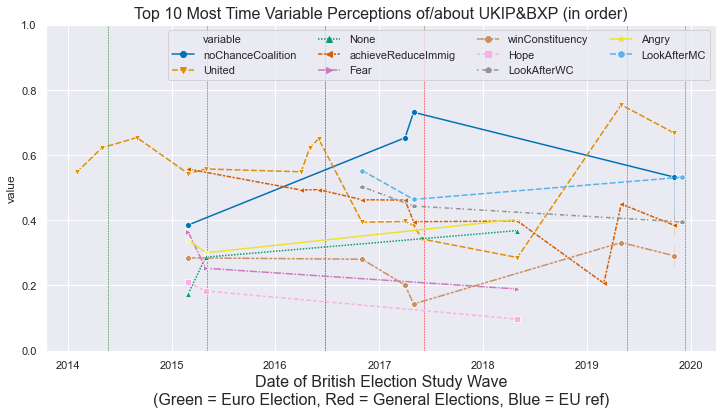

In [530]:
excluded_vars = set(df_better_ind.columns)-set(search(df_better_ind,"Partner|lr|^redist|Priorities_|Contact|con(None|Angry|Fear|Hope|Pride|Tone)").index)
cols = df_better_ind[excluded_vars].std().sort_values(ascending=False).dropna().head(10).index
title = "Top 10 Most Time Variable Perceptions of/about UKIP&BXP (in order)"

plot_party_vars(cols, title,
                ncol=4,figx=12,figy=6)

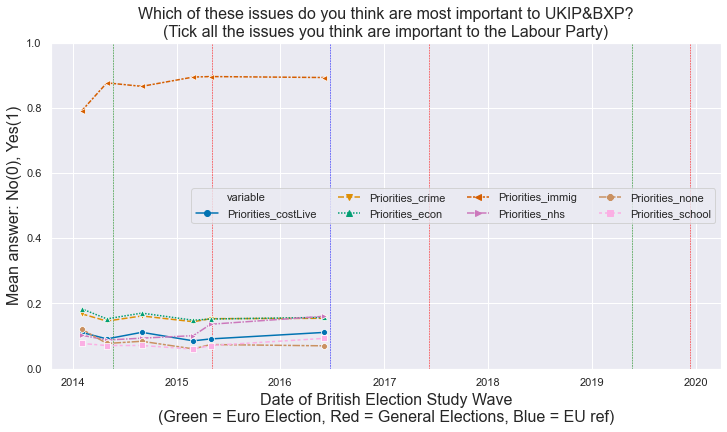

In [531]:
cols = search(df_better_ind,"Priorities").index
title = "Which of these issues do you think are most important to UKIP&BXP?\n(Tick all the issues you think are important to the Labour Party)"

plot_party_vars(cols, title, ylabel = "Mean answer: No(0), Yes(1)",
                ncol=4,figx=12,figy=6)

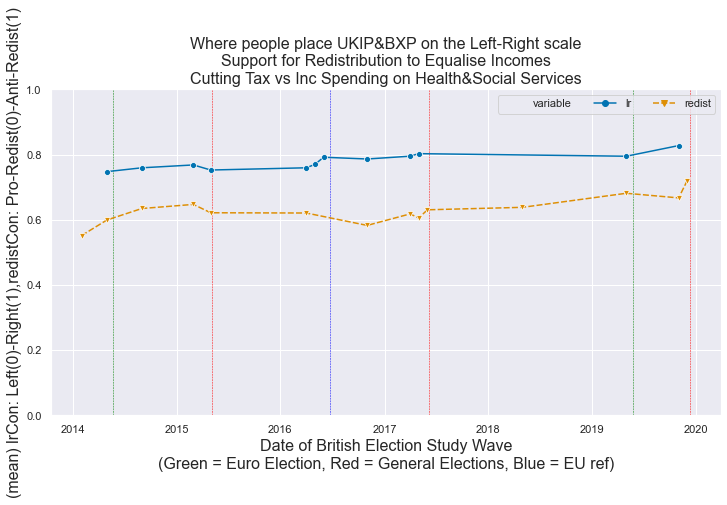

In [532]:
ec_cols = search(df_better_ind,"^lr|^redist|taxSpend").index

plot_party_vars(ec_cols,
                "Where people place UKIP&BXP on the Left-Right scale\nSupport for Redistribution to Equalise Incomes\nCutting Tax vs Inc Spending on Health&Social Services",
                ncol=4,figx=12,figy=6,
                ylabel="(mean) lrCon: Left(0)-Right(1),redistCon: Pro-Redist(0)-Anti-Redist(1)")

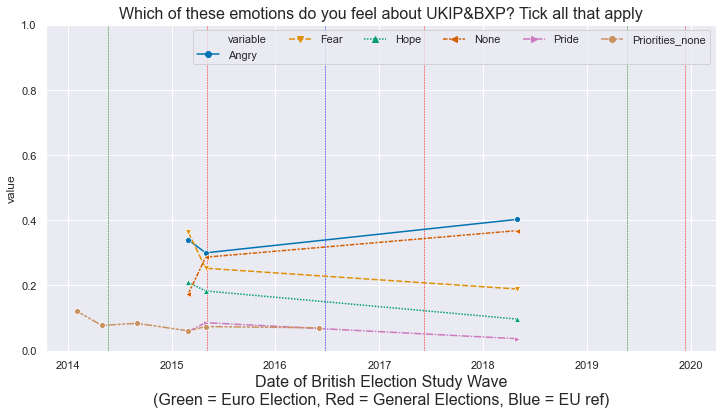

In [533]:
emote_vars = list(search(df_better_ind,"(None|Angry|Fear|Hope|Pride)").index)

plot_party_vars(emote_vars, "Which of these emotions do you feel about UKIP&BXP? Tick all that apply",
                ncol=6,figx=12,figy=6)

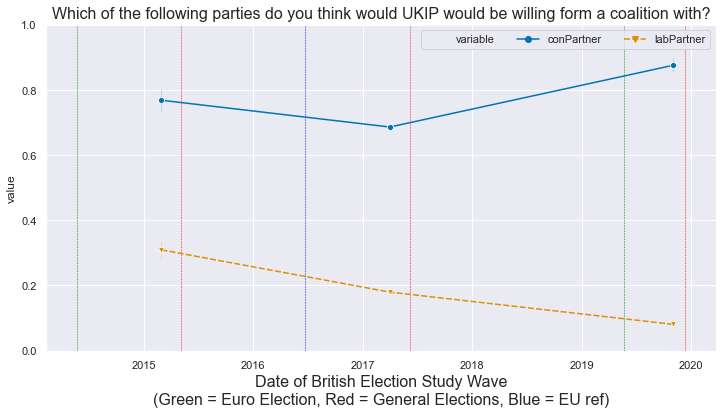

In [534]:
partner_cols = search(df_better_ind,"Partner").index

plot_party_vars(partner_cols,
                "Which of the following parties do you think would UKIP would be willing form a coalition with?",
                ncol=5,figx=12,figy=6)

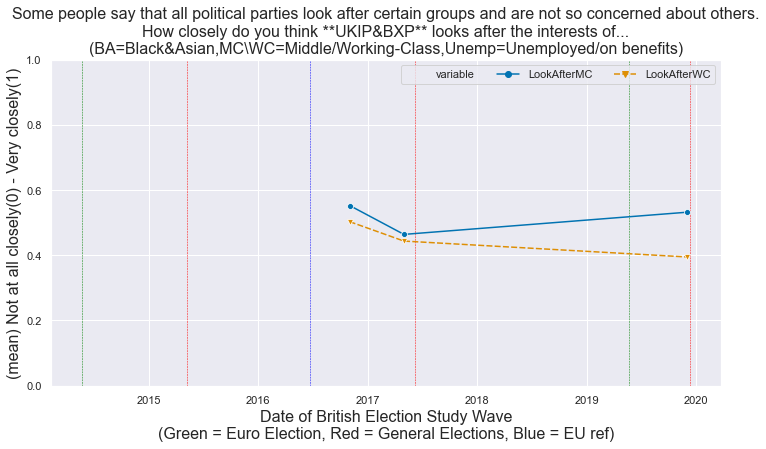

In [535]:
look_after_cols = search(df_better_ind,"LookAfter").index

plot_party_vars(look_after_cols,
                "Some people say that all political parties look after certain groups and are not so concerned about others.\nHow closely do you think **UKIP&BXP** looks after the interests of...\n(BA=Black&Asian,MC\WC=Middle/Working-Class,Unemp=Unemployed/on benefits)",
                ylabel="(mean) Not at all closely(0) - Very closely(1)",                
                ncol=5,figx=12,figy=6)

In [536]:
df_better_ind

,Angry,Fear,Hope,LookAfterMC,LookAfterWC,None,Pride,Priorities_costLive,Priorities_crime,Priorities_econ,...,lr,natSecurity,noChanceCoalition,partySite,ptv,redist,socialDist,successReduceInequality,winConstituency,majorityParty
2014-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111648,0.168510,0.183852,...,NaN,NaN,NaN,NaN,0.288940,0.551500,NaN,NaN,NaN,NaN
2014-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.091441,0.146124,0.152909,...,0.747499,NaN,NaN,NaN,0.309599,0.599260,NaN,NaN,NaN,NaN
2014-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111619,0.161823,0.170553,...,0.759287,NaN,NaN,NaN,0.308117,0.634483,NaN,NaN,NaN,NaN
2015-03-01,0.340079,0.363272,0.209310,NaN,NaN,0.174505,0.058685,0.085521,0.144117,0.148627,...,0.762881,0.290110,0.386009,0.199639,0.275742,0.647015,NaN,0.051436,0.279757,NaN
2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.773197,NaN,0.385158,0.205309,0.290212,NaN,NaN,NaN,0.289596,NaN
2015-05-01,0.300219,0.252919,0.183296,NaN,NaN,0.286811,0.085974,0.091412,0.153439,0.152489,...,0.752456,NaN,NaN,NaN,0.281623,0.621412,NaN,NaN,NaN,NaN
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.759311,0.284717,NaN,NaN,0.291162,0.620650,0.404282,NaN,NaN,NaN
2016-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.769599,NaN,NaN,NaN,0.297286,NaN,NaN,NaN,NaN,NaN
2016-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.111256,0.154597,0.157366,...,0.791668,NaN,NaN,NaN,0.257037,NaN,NaN,NaN,NaN,NaN
2016-11-01,NaN,NaN,NaN,0.552520,0.502990,NaN,NaN,NaN,NaN,NaN,...,0.786272,0.269106,NaN,NaN,0.251480,0.582643,NaN,NaN,0.280578,NaN


In [518]:
search(df_better_ind_BXP,"LookAfter")

LookAfterWC    0
LookAfterMC    0
dtype: int64

In [521]:
search(BES_Panel,"brexitLookAfter")

brexitLookAfterBAW19       8105
brexitLookAfterMCW19       8105
brexitLookAfterWCW19       8105
brexitLookAfterUnempW19    8105
dtype: int64

In [522]:
con_cols

['EUIntegrationBrexit',
 'achieveReduceImmigBrexit',
 'brexitBrexit',
 'cancelBrexit',
 'conPartnerBrexit',
 'enviroGrowthBrexit',
 'immigBrexit',
 'labPartnerBrexit',
 'likelyBrexit',
 'lrBrexit',
 'majorityPartyBrexit',
 'noChanceCoalitionBrexit',
 'partyContactBrexit',
 'redistBrexit',
 'scotBrexit',
 'socialDistBrexit',
 'voteShareBrexit',
 'voteShareConstBrexit',
 'welshBrexit',
 'winConstituencyBrexit',
 'brexitBrexPref',
 'brexitBrexit',
 'brexitCon',
 'brexitGreen',
 'brexitLD',
 'brexitLab',
 'brexitLookAfterBA',
 'brexitLookAfterMC',
 'brexitLookAfterUnemp',
 'brexitLookAfterWC',
 'brexitNextPref',
 'brexitPC',
 'brexitPriorities_1',
 'brexitPriorities_2',
 'brexitPriorities_3',
 'brexitPriorities_4',
 'brexitPriorities_5',
 'brexitPriorities_6',
 'brexitPriorities_7',
 'brexitSNP',
 'brexitSelf',
 'brexitTIG',
 'brexitTone',
 'brexitUKIP',
 'brexitUnited',
 'likeBrexitParty',
 'ptvBrexitParty']